# Examples of configuring and running NSGA-II

This notebook includes examples where the NSGA-II algorithm is used to solve continuous and binary multi-objective problems. 

There are two basic ways of using NSGA-II with MetaJul. The first one is using the `EvolutionaryAlgorithm` struct, which must be populated with specific components characterizing NSGA-II, and the second one is based on the `NSGAII` struct, which constitutes a simpler way to obtain a standard NSGA-II but it does not offer the wide range of alternatives for setting up NSGA-II variants as the first option. We include examples of both schemes in the notebook.

In [1]:
using MetaJul

## Configure NSGA-II to solve a continuous problem (Kursawe) using default settings.

The first step is to instantiate the problem to be solve. In this case, we choose the classical Kursawe continuous problem.

In [2]:
problem = kursawe() ;

The default settings of NSGA-II, used in many studies, are the following:


In [8]:
mutation = PolynomialMutation(1.0/numberOfVariables(problem),20.0, problem.bounds)
crossover = SBXCrossover(1.0, 20.0, problem.bounds)
termination = TerminationByEvaluations(25000)

solver::NSGAII = NSGAII(problem, populationSize=100,termination=TerminationByEvaluations(25000), mutation=mutation, crossover=crossover) ;

### Run the algorithm

In [9]:
optimize(solver)

println("Computing time: ", computingTime(solver))

Computing time: 1459 milliseconds


### Print the results

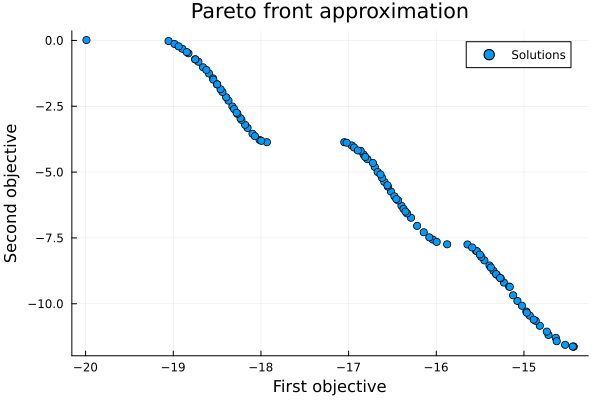

In [11]:
using Plots
 
#data to plot
x = [solution.objectives[1] for solution in foundSolutions(solver)];
y = [solution.objectives[2] for solution in foundSolutions(solver)];
 
gr();
 
scatter(x, y,  title = "Pareto front approximation", label = "Solutions")
xlabel!("First objective")
ylabel!("Second objective")

## Configure the algorithm to solve a binary problem (OneZeroMax)

In [8]:
# The oneZeroMax function consists of miximizing the number of zeros and the number of ones in a binary string
problem = oneZeroMax(512)

BinaryProblem(512, Function[MetaJul.var"#209#212"(), MetaJul.var"#210#213"()], Function[], "OneZeroMax")

In [9]:
solver::NSGAII = NSGAII()
solver.problem = problem
solver.populationSize = 100

MethodError: MethodError: no method matching NSGAII()

Closest candidates are:
  NSGAII(!Matched::BinaryProblem; populationSize, termination, dominanceComparator, crossover, mutation)
   @ MetaJul ~/Softw/julia/mic2024/MetaJul/src/algorithm/NSGAII.jl:34
  NSGAII(!Matched::ContinuousProblem; populationSize, termination, dominanceComparator, crossover, mutation)
   @ MetaJul ~/Softw/julia/mic2024/MetaJul/src/algorithm/NSGAII.jl:15


In [10]:
solver.termination = TerminationByComputingTime(Dates.Second(2))
solver.mutation = BitFlipMutation(1.0/numberOfVariables(problem))
solver.crossover = SinglePointCrossover(1.0)

UndefVarError: UndefVarError: `Dates` not defined

In [11]:
optimize(solver)

println("Computing time: ", computingTime(solver))

UndefVarError: UndefVarError: `solver` not defined

In [12]:
# data to plot
x = [solution.objectives[1] for solution in solver.foundSolutions];
y = [solution.objectives[2] for solution in solver.foundSolutions];
 
gr();
 
scatter(x, y,  title = "Pareto front approximation", label = "Solutions")
xlabel!("First objective")
ylabel!("Second objective")

UndefVarError: UndefVarError: `solver` not defined